In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from extra_functions.functions import visualize

In [2]:
alijah_data_url = 'https://raw.githubusercontent.com/oconnoag/NHANES_Data/master/compiled_data/alijah_compiled_raw.csv'
raw_data = pd.read_csv(alijah_data_url)

## Column Renaming

In [3]:
processed_data_a = raw_data.copy()

In [4]:
processed_data_b = processed_data_a.rename(columns={'HSD010': 'general_health',
                                                    'LBXTST': 'testosterone',
                                                    'LBXEST': 'estradiol',
                                                    'LBXSHBG': 'sex_hormone_binding_globulin',
                                                    'LBXGH': 'glycohemoglobin',
                                                    'LBXSBU': 'blood_urea_nitrogen',
                                                    'LBXSC3SI': 'bicarbonate',
                                                    'LBXSCA': 'calcium',
                                                    'LBXSCH': 'cholesterol',
                                                    'LBXSCLSI': 'chloride', 
                                                    'LBXSGL': 'glucose',
                                                    'LBXSIR': 'iron',
                                                    'LBXSKSI': 'potassium',
                                                    'LBXSNASI': 'sodium',
                                                    'LBXSTP': 'total_protein',
                                                    'LBXSTR': 'triglycerides',
                                                    'LBXSUA': 'uric_acid'})

## Cleaning Data

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 18 columns):
SEQN        6744 non-null float64
HSD010      6166 non-null float64
LBXTST      6235 non-null float64
LBXEST      6186 non-null float64
LBXSHBG     6039 non-null float64
LBXGH       6326 non-null float64
LBXSBU      6255 non-null float64
LBXSC3SI    6257 non-null float64
LBXSCA      6257 non-null float64
LBXSCH      6254 non-null float64
LBXSCLSI    6257 non-null float64
LBXSGL      6257 non-null float64
LBXSIR      6253 non-null float64
LBXSKSI     6257 non-null float64
LBXSNASI    6257 non-null float64
LBXSTP      6253 non-null float64
LBXSTR      6254 non-null float64
LBXSUA      6254 non-null float64
dtypes: float64(18)
memory usage: 948.5 KB


In [6]:
processed_data = processed_data_b.copy()

In [7]:
# Drop any subject that did not have a particular lab test performed
processed_data = processed_data.dropna()

In [8]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 0 to 6743
Data columns (total 18 columns):
SEQN                            5503 non-null float64
general_health                  5503 non-null float64
testosterone                    5503 non-null float64
estradiol                       5503 non-null float64
sex_hormone_binding_globulin    5503 non-null float64
glycohemoglobin                 5503 non-null float64
blood_urea_nitrogen             5503 non-null float64
bicarbonate                     5503 non-null float64
calcium                         5503 non-null float64
cholesterol                     5503 non-null float64
chloride                        5503 non-null float64
glucose                         5503 non-null float64
iron                            5503 non-null float64
potassium                       5503 non-null float64
sodium                          5503 non-null float64
total_protein                   5503 non-null float64
triglycerides                

## Data Exploration

In [9]:
print("Mean by reported health level:")
display(processed_data.groupby('general_health').mean())
print('\n')
print("Standard Deviation by reported health level:")
processed_data.groupby('general_health').std()

Mean by reported health level:


,SEQN,testosterone,estradiol,sex_hormone_binding_globulin,glycohemoglobin,blood_urea_nitrogen,bicarbonate,calcium,cholesterol,chloride,glucose,iron,potassium,sodium,total_protein,triglycerides,uric_acid
general_health,,,,,,,,,,,,,,,,,
1.0,88650.736243,260.033795,114.785643,65.573491,5.440987,13.741935,24.611006,9.429222,180.851992,103.451613,92.764706,85.698292,3.968558,138.884250,7.178178,120.601518,5.146300
2.0,88807.004762,227.253170,84.003008,63.599850,5.500680,13.965986,24.411565,9.406122,184.117007,103.343537,95.736054,84.051701,3.961816,138.721088,7.183537,127.844898,5.203265
3.0,88669.231010,212.660737,85.921147,58.623530,5.715505,14.046470,24.428954,9.371001,188.300715,103.428954,101.573727,80.497766,3.942413,138.790885,7.200045,153.021001,5.408356
4.0,88762.909594,198.025720,40.704365,54.229769,6.167343,14.970480,24.440959,9.347140,188.862546,103.062731,115.285055,76.527675,3.956771,138.480627,7.224631,165.987085,5.533579
5.0,88260.842391,178.419402,30.924924,57.595978,6.534783,16.201087,24.157609,9.360870,182.798913,102.978261,125.711957,67.657609,3.998478,138.293478,7.175000,176.092391,5.534239




Standard Deviation by reported health level:


,SEQN,testosterone,estradiol,sex_hormone_binding_globulin,glycohemoglobin,blood_urea_nitrogen,bicarbonate,calcium,cholesterol,chloride,glucose,iron,potassium,sodium,total_protein,triglycerides,uric_acid
general_health,,,,,,,,,,,,,,,,,
1.0,2900.659413,261.655919,890.316277,64.943437,0.617912,4.375638,2.005343,0.343074,40.231423,2.460531,25.347952,35.974828,0.330139,1.877392,0.408370,93.625400,1.290570
2.0,2882.676071,246.851098,595.214667,52.442025,0.745351,4.899695,2.082048,0.335920,41.031707,2.713393,28.791398,34.816744,0.328729,2.025643,0.444696,94.005810,1.316230
3.0,2838.005719,237.837561,649.198642,49.438695,0.968210,5.238145,2.118126,0.348243,42.679313,2.779982,35.974718,33.617823,0.320443,2.069440,0.459767,139.269401,1.415306
4.0,2850.867975,225.276772,82.973751,36.699891,1.548801,7.231245,2.344562,0.357225,45.368711,3.031953,55.680686,34.325827,0.354041,2.337734,0.462392,122.408048,1.549187
5.0,2959.972471,233.655279,48.061584,37.492429,1.719349,8.840901,2.728547,0.390308,44.502321,3.676772,69.798842,31.167924,0.369038,2.535165,0.531751,128.743941,1.679927


#### Correlates with general_health
with a marked threshold of |0.05| correlative factor with general_health <br>
     - testosterone
     - sex_hormone_binding_globulin
     - glycohemoglobin
     - blood_urea_nitrogen
     - 

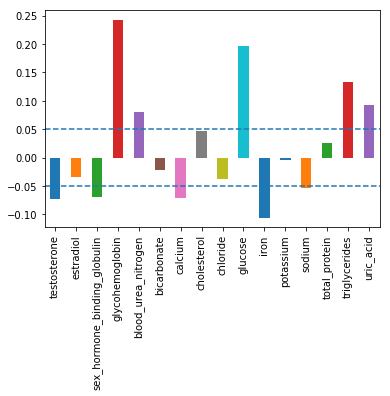

In [10]:
(processed_data.corr()['general_health'][2:]).plot.bar()
plt.axhline(y = 0.05, linestyle='--')
plt.axhline(y = -0.05, linestyle='--')

In [11]:
processed_data.corr()['general_health'][2:]

testosterone                   -0.073950
estradiol                      -0.033828
sex_hormone_binding_globulin   -0.070255
glycohemoglobin                 0.242788
blood_urea_nitrogen             0.080390
bicarbonate                    -0.021289
calcium                        -0.070835
cholesterol                     0.046213
chloride                       -0.038238
glucose                         0.196994
iron                           -0.105885
potassium                      -0.003719
sodium                         -0.053811
total_protein                   0.025567
triglycerides                   0.133174
uric_acid                       0.092814
Name: general_health, dtype: float64

#### Visualizing Individual Columns with general_health

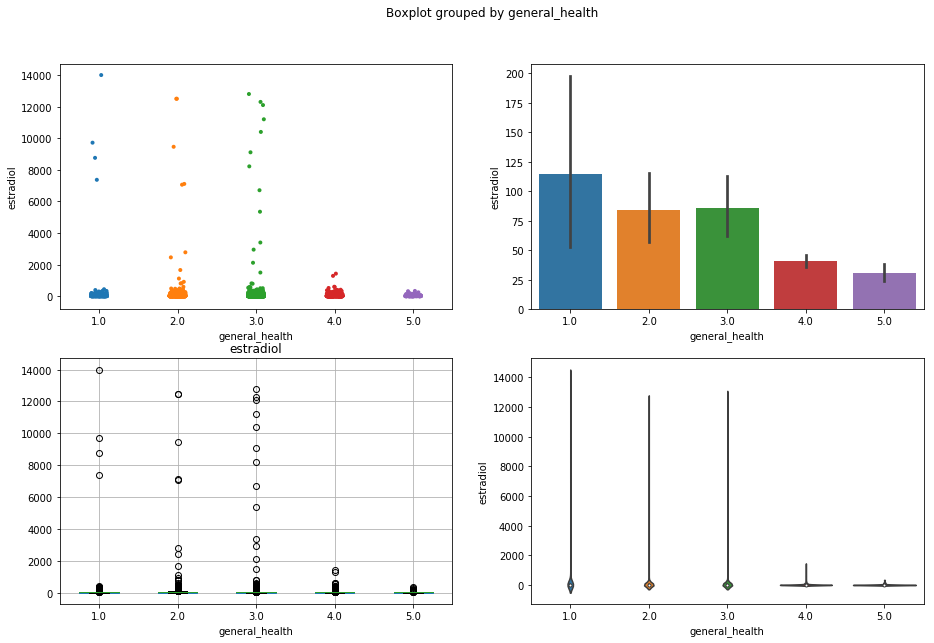

In [12]:
visualize(processed_data, 'general_health', 'estradiol')

#### Pairplot of variables meeting the 0.05 correlation threshold